In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
import pandas as pd

from statsmodels.formula.api import ols

In [3]:
N = 10000
# generate theta
x = np.random.uniform(size=N)  * 2 * 0.4 + 0.4
betaStar = 1 # can modify 
sigmaTheta = 0.01
theta = x * betaStar + np.random.randn(N) * sigmaTheta


alphaStar = 2 # can modify 
muA = x * alphaStar + np.random.randn(N) * sigmaTheta


# generate mu's
muB = muA * theta
mu = np.array([muA, muB])
sigmaA = 0.6 # can modify, larger sigmaA makes the first estimator worse
# we have to set rho =0, because the dependence already appeared in mean, otherwise, there might be identifiablity issue
rho = 0.0

Sigma = np.array([[ sigmaA**2, rho*sigmaA**2 ], [rho*sigmaA**2, sigmaA**2]])

In [4]:
# generate responses
As, Bs = np.random.multivariate_normal(np.array([0, 0]), Sigma, N).T  + mu

In [5]:
ratio = Bs/As
# bi over muA
boMA = Bs/np.mean(As)


df = pd.DataFrame(data={'RA': As, 'RB': Bs, 'ratio': ratio, 'x': x, 'xRA': x*As, 'boMA': boMA})
df['adaptIndex'] = df['RB']/df['RA']

(-2.0, 4.0)

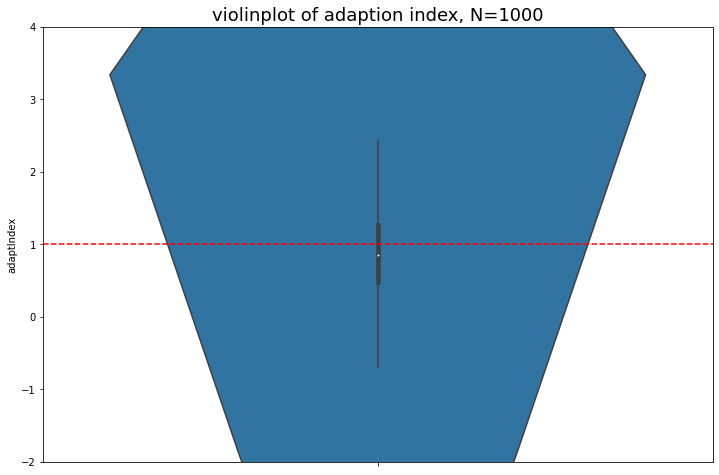

In [6]:
# Bi/Ai violinplot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(y="adaptIndex", data=df)
ax.axhline(y=1.0, color='r', linestyle='--')
ax.set_title("violinplot of adaption index, N=1000", fontsize=18)
ax.set_ylim(-2, 4)

In [7]:
# Fit OLS model for estimator 1
model = ols("ratio ~ x", df).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.52
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           5.96e-06
Time:                        22:08:09   Log-Likelihood:                -32512.
No. Observations:               10000   AIC:                         6.503e+04
Df Residuals:                    9998   BIC:                         6.504e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0797      0.224     -0.355      0.7

In [8]:
# Fit the model for estimator 2
model2 = ols("RB ~ xRA + RA", df).fit()

# Print the summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RB   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     5706.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:08:09   Log-Likelihood:                -9938.8
No. Observations:               10000   AIC:                         1.988e+04
Df Residuals:                    9997   BIC:                         1.991e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0211      0.017     61.060      0.0

In [9]:
# Fit the model for estimator 3

# first regress Ai on Xi
model3_1 = ols("RA ~ x", df).fit()

df['predicted_xRA'] = (model3_1.params[1] * x + model3_1.params[0])*x


model3_2 = ols("RB ~ predicted_xRA + RA", df).fit()

# Print the summary
print(model3_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RB   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     7703.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:08:09   Log-Likelihood:                -9083.7
No. Observations:               10000   AIC:                         1.817e+04
Df Residuals:                    9997   BIC:                         1.819e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0221      0.015      1.511

In [10]:
model3_1.params[1]

2.0012035800291894

In [11]:
model3_1.fittedvalues

0       0.826110
1       1.028974
2       1.553042
3       1.496529
4       1.353479
          ...   
9995    1.220670
9996    1.037183
9997    1.672353
9998    1.594566
9999    1.201725
Length: 10000, dtype: float64